In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataset downloads
abalone=pd.read_csv('abalone.csv')
print(abalone.columns)

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')


In [4]:
#dimension obtains
print("dimension of abalone data:{}".format(abalone.shape))

dimension of diabetes data:(4176, 9)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(abalone.loc[:,abalone.columns!='M'],abalone['M'],stratify=abalone['M'],random_state=66)

##k-NN##

from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]
#range() 1to10
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    #kNN model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #Training set and test set accuracy storage
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

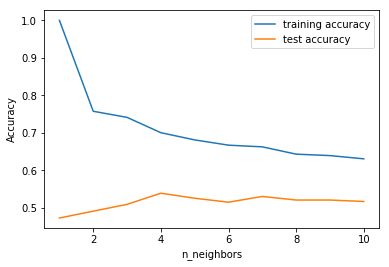

In [6]:
#Comparison of training set and test set accuracy
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')
plt.show()

In [7]:
## SVM##

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

print('Accuracy of SVM classifier on training set:{:.3f}'.format(svc.score(X_train,y_train)))
print('Accuracy of SVM classifier on test set:{:.3f}'.format(svc.score(X_test,y_test)))

Accuracy of SVM classifier on training set:0.552
Accuracy of SVM classifier on test set:0.530


In [8]:
#Parameter adjustment test
#1.SVM needs to adjust each eigenvalue scale to make it basically on the same scale.  Measurement standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

svc=SVC()
svc.fit(X_train_scaled,y_train)

print('Accuracy of SVM classifier(scaled) on training set:{:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('Accuracy of SVM classifier(scaled) on test set:{:.3f}'.format(svc.score(X_test_scaled,y_test)))

Accuracy of SVM classifier(scaled) on training set:0.547
Accuracy of SVM classifier(scaled) on test set:0.513


In [21]:
#2.Raise C or gamma
svc1=SVC(C=100,gamma=0.1,kernel='poly')

svc1.fit(X_train_scaled,y_train)

print('Accuracy of SVM classifier(C=1000) on training set:{:.3f}'.format(svc1.score(X_train_scaled,y_train)))
print('Accuracy of SVM classifier(C=1000) on test set:{:.3f}'.format(svc1.score(X_test_scaled,y_test)))



Accuracy of SVM classifier(C=1000) on training set:0.542
Accuracy of SVM classifier(C=1000) on test set:0.521


NameError: name 'C' is not defined